## Logistic Regression

In logistic regression, the Perceptron trick is a method used to update the weights iteratively during training. It's based on the concept of gradient descent and aims to minimize the logistic loss function by adjusting the weights towards the optimal values. Here's how the Perceptron trick works in logistic regression using the sigmoid function:

### Background:

Logistic regression predicts the probability that an instance belongs to a particular class using the logistic (or sigmoid) function. The logistic function maps the linear combination of input features and weights plus a bias term to a value between 0 and 1, representing the probability of the positive class.

### Logistic Function (Sigmoid):

The logistic function, denoted as $ \sigma(z) $, is defined as:

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

Where:
- $ z = \mathbf{w}^T \mathbf{x} = \sum_{i}^{n}\mathbf{w_i x_i} $ is the linear combination of weights ($ \mathbf{w} $) and input features ($ \mathbf{x} $).
- $ \mathbf{w} $ are the weights, and $ \mathbf{x} $ are the input features.

### Probability Prediction:

In logistic regression, the predicted probability that an instance belongs to the positive class (class 1) is given by the logistic function:

$ \hat{y} = \sigma(\mathbf{w}^T \mathbf{x}) $ &nbsp; OR &nbsp; $ \sigma(\sum_{i}^{n}\mathbf(w_i x_i)) $

Where:
- $ \hat{y} $ is the predicted probability.
- $ \sigma(z) $ is the logistic function.
- $ \mathbf{w_0} $ is the bias term or intercept.
- $ \mathbf{n} $ is the total number of columns.

### Perceptron Trick:

1. **Prediction:** Compute the predicted probability $ \hat{y} $ using the current weights: $ \hat{y} = \sigma(\mathbf{w}^T \mathbf{x}) $.
  
2. **Error Calculation:** Calculate the error between the predicted and true labels: $ \text{error} = y - \hat{y} $, where $ y $ is the true label (0 or 1).

3. **Weight Update:** Update the weights using the Perceptron trick based on the error and the derivative of the logistic function:

   $ \mathbf{w_new} := \mathbf{w_old} + \eta \cdot \text{error} \cdot \mathbf{x} $

   Where:
   - $ \eta $ is the learning rate, controlling the step size of the weight updates.
   - $ \mathbf{w_0} $ is the bias term or intercept.

4. **Repeat:** Iterate through the dataset multiple times (epochs), updating the weights after each data point or mini-batch.

### Interpretation:

- The Perceptron trick adjusts the weights and bias iteratively based on the error between the predicted and true labels, aiming to minimize the logistic loss function.
- By updating the weights in the direction that reduces the error, logistic regression learns the optimal parameters for making accurate predictions.

### Summary:

The Perceptron trick in logistic regression is a fundamental technique for updating weights during training. It combines the logistic function's probabilistic predictions with the Perceptron algorithm's weight update mechanism, enabling efficient optimization of logistic regression models for binary classification tasks.

In [21]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [22]:
import matplotlib.pyplot as plt

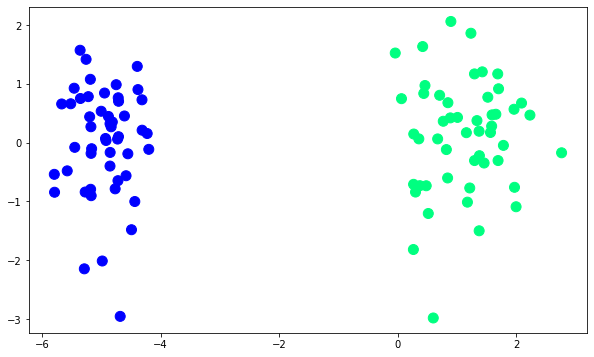

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [25]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [26]:
def step(z):
    return 1 if z>0 else 0

In [27]:
intercept_,coef_ = perceptron(X,y)

In [28]:
print(coef_)
print(intercept_)

[1.1134548  0.33857969]
1.3000000000000003


In [29]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [30]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

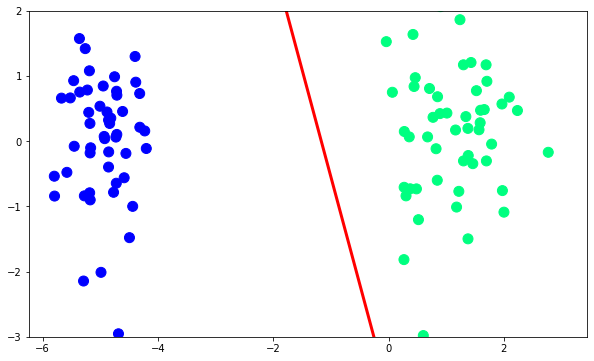

In [31]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [32]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [33]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [34]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

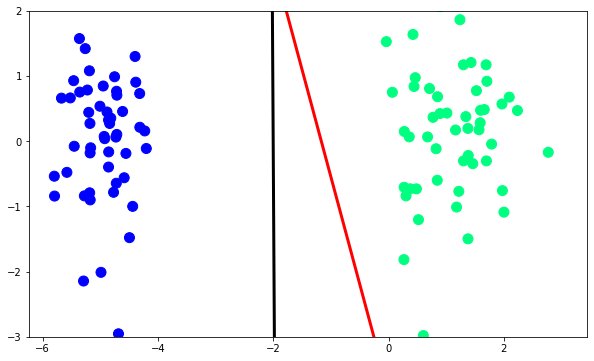

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [36]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [37]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [38]:
intercept_,coef_ = perceptron(X,y)

In [39]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [40]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

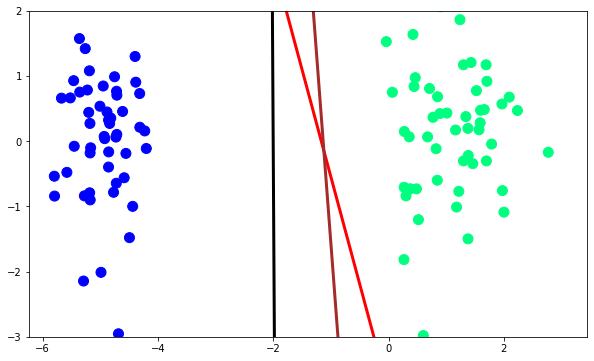

In [41]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)